# <center> **Credit Risk Modeling** <center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Predicting-Loan-Status" data-toc-modified-id="Predicting-Loan-Status-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predicting Loan Status</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## **Introduction**


Performing following operations:

-  Data Cleaning and Feature Engineering
-  Exploratory Data Analysis
-  Prediction of Loan Status

The major objective of this project is to predict whether the bank will approve the borrower based on certain information. Therefore, this is a supervised classification problem to be trained. Algorithms tested for this project include Support Vector Classifier and XGBoost Classifier. I will compare the results of these models to discover which algorithm works better for this specific dataset.

## **Importing Libraries**

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import plotly.io as pio
pio.renderers.default='colab'

## **Loading Dataset**

In [429]:
from google.colab import drive
drive.mount('/content/drive')
df =pd.read_csv("drive/My Drive/Colab Notebooks/loan_prediction_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Features of our Data

1. **Loan ID**: Unique Loan ID
2. **Gender**: Male/ Female
3. **Married**: Applicant married (Y/N)
4. **Dependents**: Number of dependents
5. **Education**: Applicant Education (Graduate/ Under Graduate)
6. **Self Employed**: Self-employed (Y/N)
7. **Applicant Income**: Applicant income
8. **Co-applicant Income**: Coapplicant income
9. **Loan Amount**: Loan amount in thousands
10. **Loan Amount Term**: Term of the loan in months
11. **Credit History**: Credit history meets guidelines
12. **Property Area**: Urban/ Semi-Urban/ Rural
13. **Loan Status**: (Target) Loan approved (Y/N)

In [430]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- We can observe from the above top 5 entries that there are object and numeric data types in our dataset
- There are null values in our data which needs to be handled before we start building our model
- Loan Status is our target columns which needs to be predicted based on the remaining independent features of our data
- Above information reflects that our dataset has 5 numerical and 8 object columns
- There are null values in multiple columns which needs to be handled
- There are total 13 columns in our dataset

## **Data Cleaning**

In [431]:
100*df.isnull().sum()/df.shape[0]

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

Now we select the columns that contain between 0.5% and 70% null values, and replace the null values with the mean (for numerical columns) or median (for categorical columns) of each column.

**Gender**

In [432]:
pd.get_dummies(df['Gender'].dropna(), drop_first=True).median()

Male    1.0
dtype: float64

In [433]:
df['Gender']=df['Gender'].fillna('Male')

**Dependents**

In [434]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [435]:
df['Dependents'].dtypes

dtype('O')

In [436]:
le=LabelEncoder()
le.fit(df['Dependents'].dropna())
pd.Series(le.transform(df['Dependents'].dropna())).median()

0.0

In [437]:
df['Dependents']=df['Dependents'].fillna('0')

**Self_Employed**

In [438]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [439]:
pd.get_dummies(df['Self_Employed'].dropna(), drop_first=True).median()

Yes    0.0
dtype: float64

In [440]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

**LoanAmount**

In [441]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

**Loan_Amount_Term**

In [442]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.,
       350.,   6.])

In [443]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

**Credit_History**

In [444]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [445]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

**Married**

Fianlly the Married column that contain less than 0.5% null values is remained, and we drop the rows of df that contain these null values.

In [446]:
df.dropna(inplace=True)

In [447]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Feature Engineering**

We rename some of the columns.

In [448]:
df.columns=df.columns.str.lower()

In [449]:
df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicant_income', 'co-applicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']

In [450]:
df.head(2)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N


In [452]:
df.describe()

,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,5399.513912,1627.972046,146.236894,342.324059,0.854337
std,6120.764249,2931.747971,84.243687,64.208419,0.353057
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,128.000000,360.000000,1.000000
75%,5790.000000,2304.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## **Exploratory Data Analysis**

We want to figure out how many applicants are eligible for loan.

In [453]:
df[df['loan_status']=='Y'].count()['loan_status']

419

In [454]:
df[df['loan_status']=='N'].count()['loan_status']

192

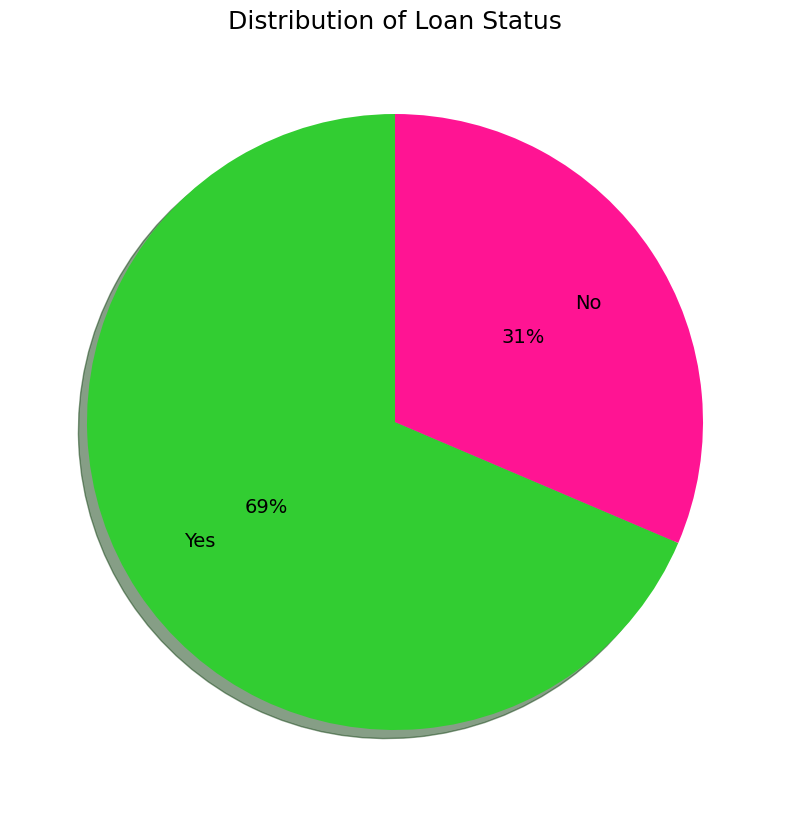

In [455]:
plt.figure(figsize=(10,10))
plt.pie(x=[419,192], labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,shadow=True, startangle=90, colors=['limegreen', 'deeppink'], textprops={'fontsize':14})
plt.title('Distribution of Loan Status', fontsize=18)
plt.show()

We can see that bank approves loans requested by 69% of applicants and does not approve loans requested by 39% of applicants.

### Finding and visualizing the impacts of different factors on loan status.

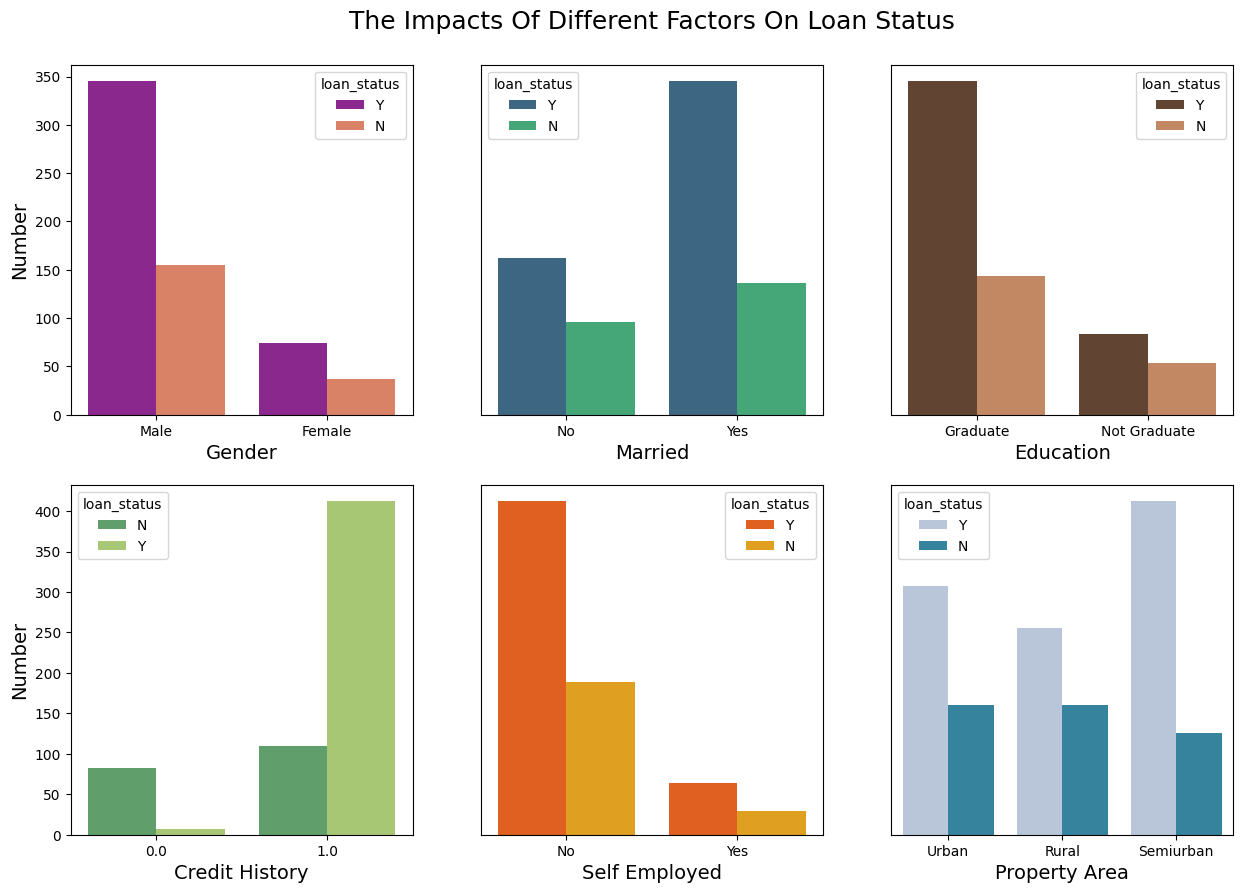

In [456]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='gender' ,hue='loan_status', data=df,palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])
plt.xlabel('Married', fontsize=14)
plt.title('The Impacts Of Different Factors On Loan Status\n', fontsize=18)

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='credit_history', data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.subplot(2,3,5)
sns.countplot(x='self_employed',hue='loan_status',data=df,palette='autumn')
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',hue='loan_status',data=df,palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()

From the above analysis, it can be concluded that:

- Male Individuals have more chance of receiving the Loan.

- Married Individuals have more chance of receiving the Loan.
   
- Graduate Individuals have more chance of receiving the Loan.
    
- Not Self-Employed have more chance of receiving the Loan.

- Individuals with a credit history have more chance of receiving the Loan.
    
- People living in Semi-Urban Area have more chance to receive the Loan.

### Illustrating the loan status versus the gender, marrital status and education of individuals.

In [457]:
df['married_revised']=df['married'].apply(lambda x: 'Married' if x=='Yes' else 'Single')

In [458]:
df['loan_status_revised']=df['loan_status'].apply(lambda x: 'Receive Loan' if x=='Y' else 'Not Receive Loan')

In [459]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status,married_revised,loan_status_revised
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,Single,Receive Loan
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,Married,Not Receive Loan
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,Married,Receive Loan
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,Married,Receive Loan
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,Single,Receive Loan


In [460]:
fig=px.sunburst( data_frame=df,path=['gender','married_revised','education','loan_status_revised'], color='loan_amount', color_continuous_scale='rainbow', height=800, width=800)
fig.update_layout(
    title={
        'text': 'Loan Status Versus Gender, Marrital Status And Education \n',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [461]:
df.drop(['married_revised','loan_status_revised'], axis=1, inplace=True)

### Visualizing the impacts of different factors on the amount of loans.

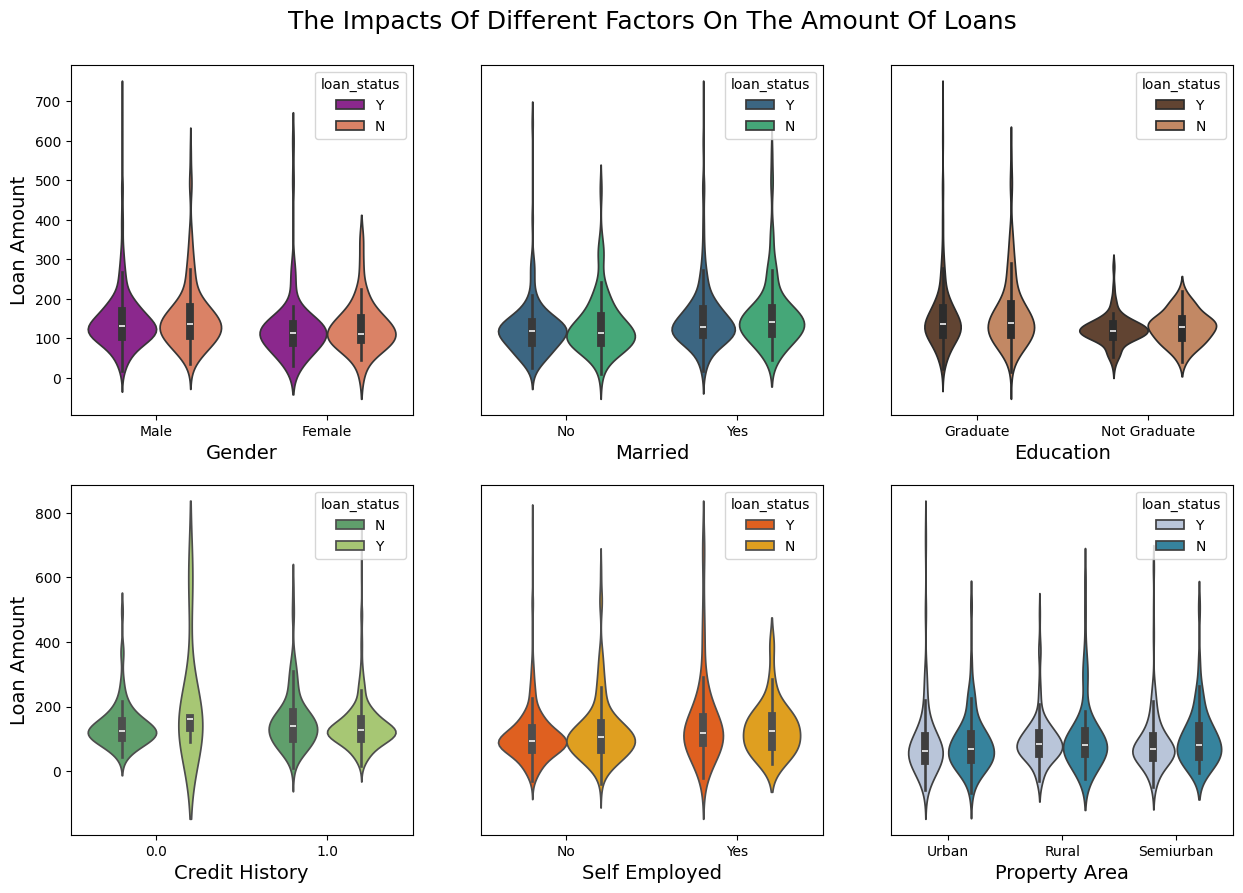

In [462]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.xlabel('Married', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.title('The Impacts Of Different Factors On The Amount Of Loans\n', fontsize=18)

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()

### Analyzing the distribution of applicant_income, co-applicant_income and loan_amount.

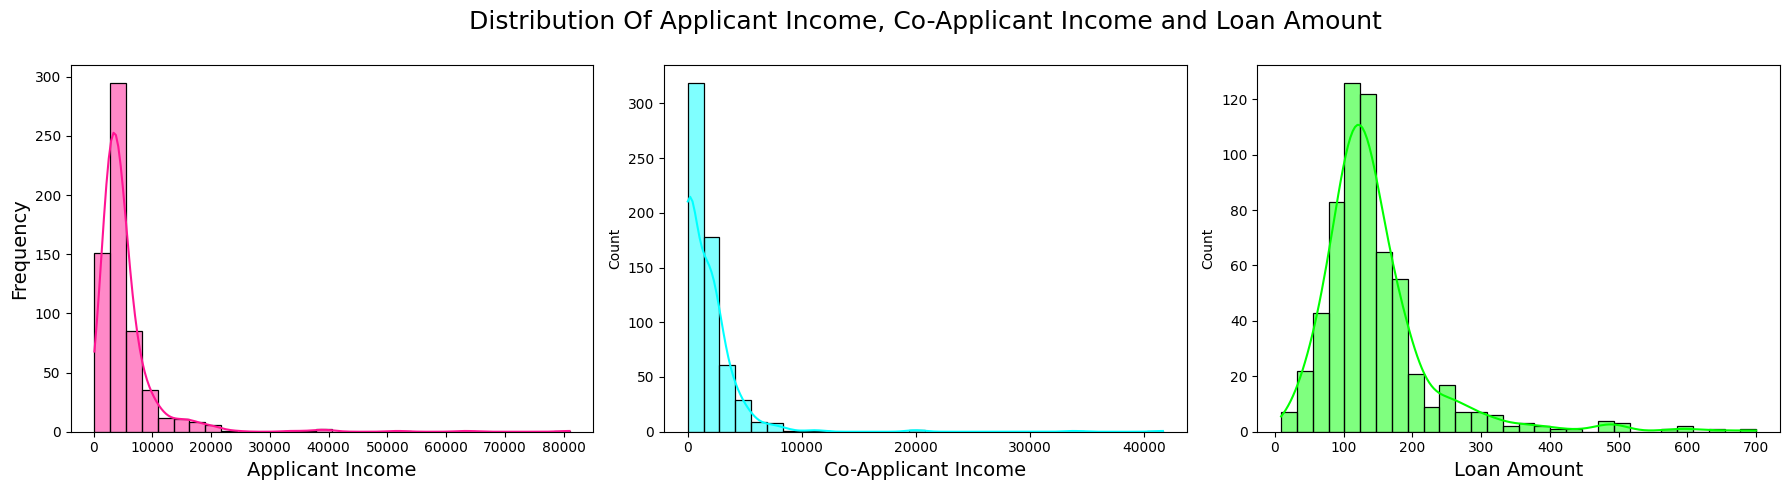

In [463]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='applicant_income', bins=30, color='deeppink', kde=True, edgecolor='black')
plt.xlabel('Applicant Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,3,2)
sns.histplot(data=df, x='co-applicant_income', bins=30, color='cyan', kde=True, edgecolor='black')
plt.xlabel('Co-Applicant Income', fontsize=14)
plt.title('Distribution Of Applicant Income, Co-Applicant Income and Loan Amount\n', fontsize=18)

plt.subplot(1,3,3)
sns.histplot(data=df, x='loan_amount', bins=30, color='lime', kde=True, edgecolor='black')
plt.xlabel('Loan Amount', fontsize=14)

plt.tight_layout()
plt.show()

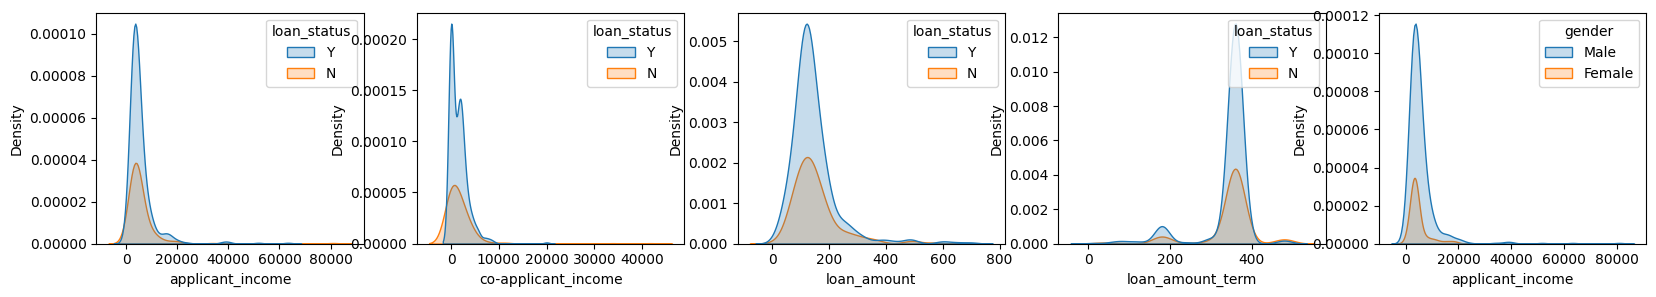

In [464]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.kdeplot(x=df['applicant_income'],hue=df['loan_status'],fill=True,ax=axs[0])
sns.kdeplot(x=df['co-applicant_income'],hue=df['loan_status'],fill=True,ax=axs[1])
sns.kdeplot(x=df['loan_amount'],hue=df['loan_status'],fill=True,ax=axs[2])
sns.kdeplot(x=df['loan_amount_term'],hue=df['loan_status'],fill=True,ax=axs[3])
sns.kdeplot(x=df['applicant_income'],hue=df['gender'],fill=True,ax=axs[4])
plt.show()

1. There is high positive skewness in Applicant income and coapplicant income
2. There is negative skewness in loan_Amount_term
3. Income range between 0:20k are eligible for loan

### Visualizing the relationship between applicant_income, co-applicant_income and loan_amount.

In [465]:
fig=px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')
fig.update_layout(
    title={
        'text': 'Relationship Between Applicant Income, Co-Applicant Income and Loan Ammount',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## **Predicting Loan Status**

### Encoding Categorical Variables

**Gender**

In [466]:
le1=LabelEncoder()
le1.fit(df['gender'])
df['gender']=le1.transform(df['gender'])

**Married**

In [467]:
le2=LabelEncoder()
le2.fit(df['married'])
df['married']=le2.transform(df['married'])

**Education**

In [468]:
le3=LabelEncoder()
le3.fit(df['education'])
df['education']=le3.transform(df['education'])

**Self Employed**

In [469]:
le4=LabelEncoder()
le4.fit(df['self_employed'])
df['self_employed']=le4.transform(df['self_employed'])

**Property Area**

In [470]:
le5=LabelEncoder()
le5.fit(df['property_area'])
df['property_area']=le5.transform(df['property_area'])

**Dependents**

In [471]:
le6=LabelEncoder()
le6.fit(df['dependents'])
df['dependents']=le6.transform(df['dependents'])

### Correlation of data using **Heat Map**

Dropping the loan_id column as it's a noise for our model and doesn't make any impact on the target

In [472]:
df.drop('loan_id',axis=1,inplace=True)

In [473]:
df.replace({'married':{'Yes':1,'No':0},'self_employed':{'No':0,'Yes':1},'property_area':\
            {'rural':0,'semiurban':0.5,'urban':1},'education':{'graduate':1,"not graduate":0},\
            'loan_status': {'Y':1, 'N':0}},inplace=True)

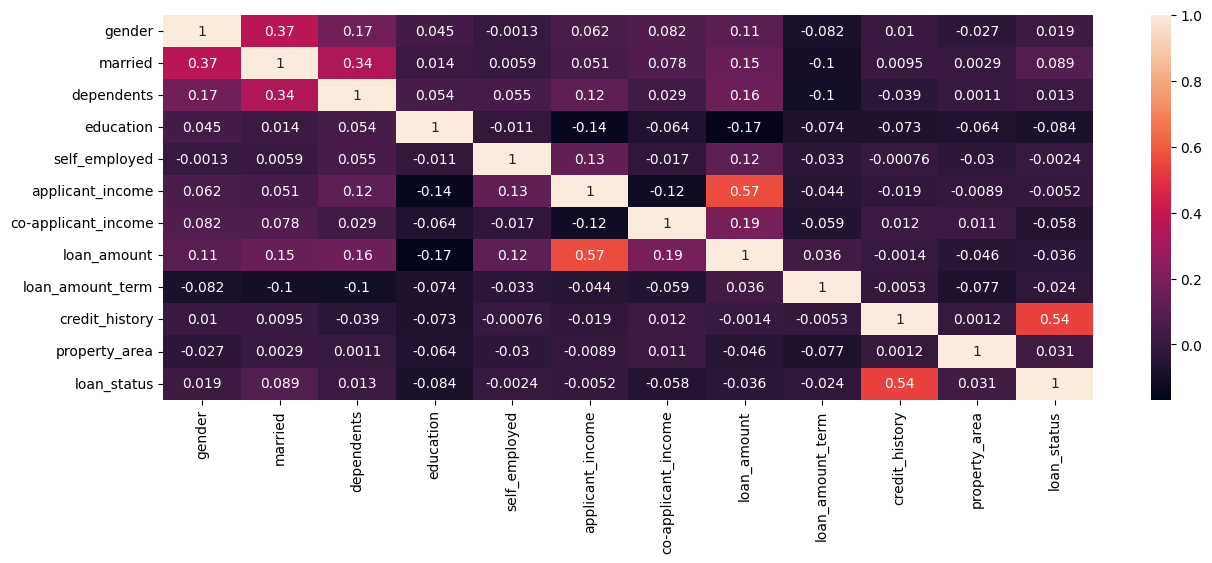

In [474]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

1. Credit history is highly correlated to our target
2. Education, self_employed, coapplicant income, loan amount, applicant income has negative correlation
3. Loan amount and applicant income are highly correlated
4. Gender-Married & Dependents-Married are correlated
5. This reflects that there are multicoreniality

### Normalising the data (Standardization)

In [475]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=df.drop(['loan_status'],axis=1)
X.iloc[:,:]=ss.fit_transform(X.iloc[:,:])
X.head()

,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.471169,-1.366947,-0.740606,-0.530021,-0.393712,0.073496,-0.555746,-0.044258,0.275516,0.412914,1.223647
1,0.471169,0.731557,0.249570,-0.530021,-0.393712,-0.133510,-0.040955,-0.216655,0.275516,0.412914,-1.315057
2,0.471169,0.731557,-0.740606,-0.530021,2.539925,-0.392350,-0.555746,-0.953218,0.275516,0.412914,1.223647
3,0.471169,0.731557,-0.740606,1.886717,-0.393712,-0.460534,0.249212,-0.311696,0.275516,0.412914,1.223647
4,0.471169,-1.366947,-0.740606,-0.530021,-0.393712,0.098187,-0.555746,-0.062215,0.275516,0.412914,1.223647


### Splitting the Data

In [476]:
y=df['loan_status']

In [477]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.25,stratify=y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(458, 11) (458,) (153, 11) (153,)


In [478]:
le7 = LabelEncoder()
y_train = le7.fit_transform(y_train)
y_test = le7.transform(y_test)

### **Support Vector Classifier**

In [479]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

In [480]:
print(confusion_matrix(y_test,predictions_svc))

[[ 22  26]
 [  0 105]]


In [481]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        48
           1       0.80      1.00      0.89       105

    accuracy                           0.83       153
   macro avg       0.90      0.73      0.76       153
weighted avg       0.86      0.83      0.81       153



In [482]:
train_accuracy_svc=svc.score(X_train,y_train)
print(f"Training Accuracy of SVC: {train_accuracy_svc}")
test_accuracy_svc=svc.score(X_test,y_test)
print(f"Test Accuracy of SVC: {test_accuracy_svc}")

Training Accuracy of SVC: 0.8122270742358079
Test Accuracy of SVC: 0.8300653594771242


### **XGBoost Classifier**

In [483]:
xgbc=xgb.XGBClassifier(n_estimators=80, learning_rate=0.1, gamma=0, subsample=0.8, colsample_bytree=0.7, max_depth=3, reg_lambda=1, reg_alpha=0.1, eval_metric='logloss')
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [484]:
predictions_xgbc=xgbc.predict(X_test)

In [485]:
print(confusion_matrix(y_test,predictions_xgbc))
print('\n')
print(classification_report(y_test,predictions_xgbc))

[[ 23  25]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.88      0.48      0.62        48
           1       0.80      0.97      0.88       105

    accuracy                           0.82       153
   macro avg       0.84      0.73      0.75       153
weighted avg       0.83      0.82      0.80       153



In [486]:
train_accuracy_xgbc=xgbc.score(X_train,y_train)
print(f"Training Accuracy of xgbc: {train_accuracy_xgbc}")
test_accuracy_xgbc=xgbc.score(X_test,y_test)
print(f"Test Accuracy of xgbc: {test_accuracy_xgbc}")

Training Accuracy of xgbc: 0.8449781659388647
Test Accuracy of xgbc: 0.8169934640522876


In [487]:
print('Accuracy Score, Support Vector Classifier: ', round(accuracy_score(y_test,predictions_svc),ndigits=4))
print('Accuracy Score, XGBoost Classifier: ', round(accuracy_score(y_test,predictions_xgbc), ndigits=4))

Accuracy Score, Support Vector Classifier:  0.8301
Accuracy Score, XGBoost Classifier:  0.817


Both SVM and XGBoost algorithm are not giving the output as expected as the recall value is still low because our target is not balanced

## Balancing the Target Variable using SMOTE


<Axes: ylabel='count'>

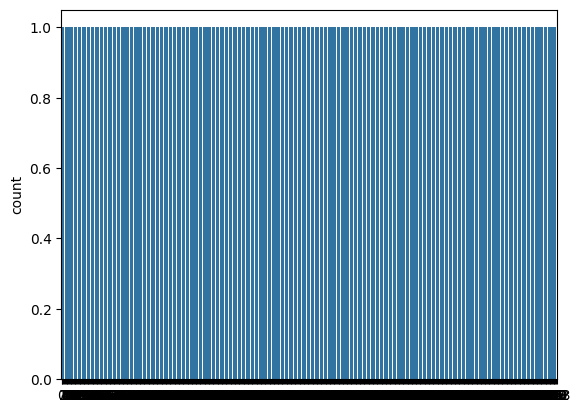

In [488]:
sns.countplot(df['loan_status'])

In [489]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=df.drop(['loan_status'],axis=1)
X.iloc[:,:]=ss.fit_transform(X.iloc[:,:])
X.head()

,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.471169,-1.366947,-0.740606,-0.530021,-0.393712,0.073496,-0.555746,-0.044258,0.275516,0.412914,1.223647
1,0.471169,0.731557,0.249570,-0.530021,-0.393712,-0.133510,-0.040955,-0.216655,0.275516,0.412914,-1.315057
2,0.471169,0.731557,-0.740606,-0.530021,2.539925,-0.392350,-0.555746,-0.953218,0.275516,0.412914,1.223647
3,0.471169,0.731557,-0.740606,1.886717,-0.393712,-0.460534,0.249212,-0.311696,0.275516,0.412914,1.223647
4,0.471169,-1.366947,-0.740606,-0.530021,-0.393712,0.098187,-0.555746,-0.062215,0.275516,0.412914,1.223647


In [490]:
y=df['loan_status']

In [491]:
print('Shape before balancing data',X.shape,y.shape)

#Importing necessary modules
from sklearn.datasets import make_classification
#from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

Shape before balancing data (611, 11) (611,)


In [492]:
#Classifying the data
X,y=make_classification(n_samples=200,weights=[0.9, 0.1],flip_y=0)

#Creating an object
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print('Shape after balancing data',X.shape,y.shape)

Shape after balancing data (360, 20) (360,)


<Axes: ylabel='count'>

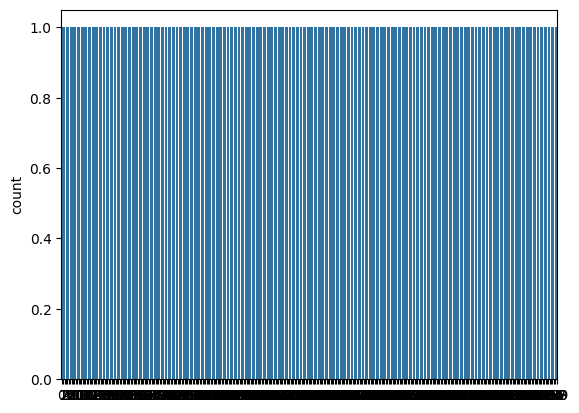

In [493]:
sns.countplot(y)

Splitting the data

In [494]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.25)
print('Shape: ',X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Shape:  (270, 20) (270,) (90, 20) (90,)


### SVM after applying SMOTE

In [495]:
svc_new=SVC(kernel='linear', C=1)
svc_new.fit(X_train,y_train)
predictions_svc_new=svc_new.predict(X_test)

In [496]:
print(classification_report(y_test,predictions_svc_new))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.95      0.91      0.93        46

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



In [497]:
train_accuracy_svc_new=svc_new.score(X_train,y_train)
print(f"Training Accuracy of SVC: {train_accuracy_svc_new}")
test_accuracy_svc_new=svc_new.score(X_test,y_test)
print(f"Test Accuracy of SVC: {test_accuracy_svc_new}")

Training Accuracy of SVC: 0.9444444444444444
Test Accuracy of SVC: 0.9333333333333333


### XGBoost after applying SMOTE

In [498]:
xgbc_new = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.01,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.7,
    max_depth=3,
    reg_lambda=1,
    reg_alpha=0.1,
    eval_metric='logloss'
)
xgbc_new.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [499]:
predictions_xgbc_new=xgbc_new.predict(X_test)

In [500]:
print(confusion_matrix(y_test,predictions_xgbc_new))
print('\n')
print(classification_report(y_test,predictions_xgbc_new))

[[43  1]
 [ 3 43]]


              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.93      0.96        46

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [501]:
train_accuracy_xgbc_new=xgbc_new.score(X_train,y_train)
print(f"Training Accuracy of xgbc: {train_accuracy_xgbc_new}")
test_accuracy_xgbc_new=xgbc_new.score(X_test,y_test)
print(f"Test Accuracy of xgbc: {test_accuracy_xgbc_new}")

Training Accuracy of xgbc: 0.9592592592592593
Test Accuracy of xgbc: 0.9555555555555556


Again with SMOTE balancing algo, SVM and XGBoost are giving effective training testing accuracy without any risk of overfitting

## Conclusion

-  We performed Data Cleaning and Feature Engineering to convert the dataset to an acceptable format.

-  We performed Exploratory Data Analysis and visualized the loan status versus different features.

- XGBoost with the accuracy of 95.55% was the best model for predicting whether the bank will approve the requested loans.